# Chapter 10. RNN - 딥러닝을 이용한 문서 분류
* 카운트 기반 문서표현
    * 단어들의 통계를 통해 문서의 내용 이해 
* 딥러닝 
    * 단어 순서를 반영해 문맥을 이해하는 방식으로 작동 
    * RNN(Recurrent Neural Network) : 문장을 이해하기 위해 단어의 순서를 고려하는 모형 

## 01. 왜 RNN 일까?
* RNN(Recurrent Neural Networks)
    * 시계열 데이터를 다루기 위한 모형 - 어떤 변수의 값이 시간에 따라 변화 
    * 일정한 시간 간격으로 측정한 시계열 데이터에는 특정한 규칙성, 패턴이 있음 
    * 이러한 패턴을 기반으로 다음 값을 예측하는 것이 가능해짐 
    * 시계열 예측모형에서 가장 중요한 가정 : 앞의 값들이 뒤의 값에 영향을 미친다는 것 
    * --> RNN은 바로 이러한 순차적인 영향을 표현하기 위한 모형 

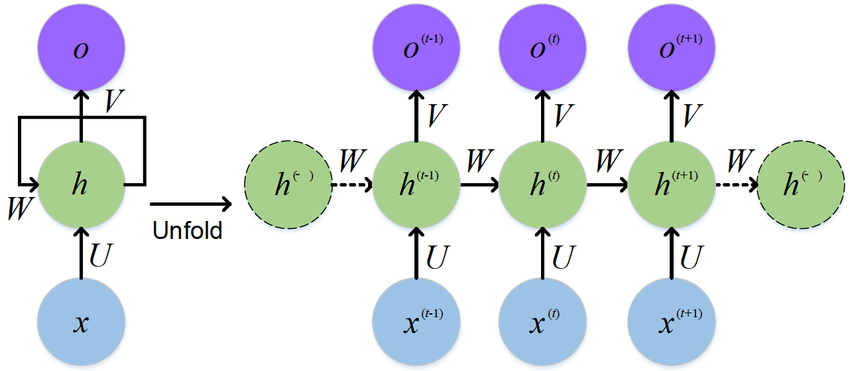

In [5]:
#----------------------------------------
# 10.1.1 RNN 의 이해
# x(t): 단일 값 / 벡터(많은 변수 사용 시)
# 은닉층에 있는 노드를 통해 다음 상태에 영향을 미침 
# x(t-1) 의 입력값이 h(t-1) 값으로 압축되고, 이 값은 x(t) 값의 정보가 압축된 은닉 노드 h(t)에 영향을 미침 
# 시계열의 앞 값들이 뒤에 미치는 영향은 은닉층의 노드들 간의 연결을 통해 구현됨 
# h(t)는 다시 h(t+1)에 영향을 미치므로, 이러한 의존성은 앞에서부터 계속 축적됨 
# RNN의 출력인 o는 모형을 통해 예측하고 싶은 값/라벨을 구성하면 됨 
    # O(t)는 x(t+1)
    # x(t)까지의 이전 관측값 이용해 --> x(t+1)을 예측하고자 함 
    # o(t)는 x(t+1)의 라벨이 됨 
#----------------------------------------
from IPython.display import Image
Image(filename = './img/ch10/The-standard-RNN-and-unfolded-RNN.PNG')

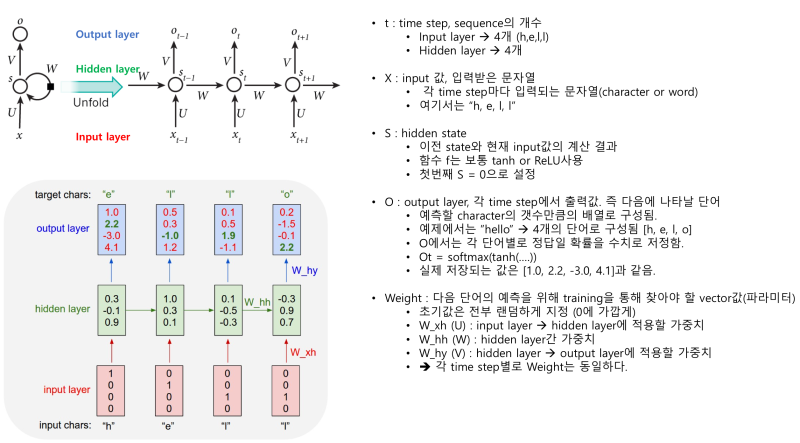

In [6]:
from IPython.display import Image
Image(filename = './img/ch10/RNN_architecture.PNG')

In [10]:
#----------------------------------------
# 10.1.2 RNN이 문서 분류에 적합한 이유 
# RNN 의 전형적인 예: 시계열 
    # 앞에서부터 순차적으로 미치는 영향을 계속 축적하기 때문 
    # 이와 같은 과정, 문맥을 이해하는 것과 유사함 
    # 말을 순차적으로 들으며 의미를 파악 

# 문맥 파악 
    # 단어들의 순서를 통해 문맥을 파악 
    # RNN 구조상 이와 같은 문맥을 파악하기 좋은 모형 
    # ex. I am so happy
        # I(초기 은닉 노드 값) -> 은닉 노드 (I)
        # am-> 은닉 노드 (am)
            # 은닉 노드 (I) + 은닉 노드(am) -- 다음 은닉노드 생성 .. 반복 
            # 최종 은닉 노드 : 네 단어의 정보가 순차적으로 축적 
    
# RNN 단점 
    # 대표적인 경사소실 문제 발생 
    # but, 문맥의 파악을 잘 반영하여 텍스트 마이닝에 딥러닝을 적용한 대표적인 출발점 
#----------------------------------------

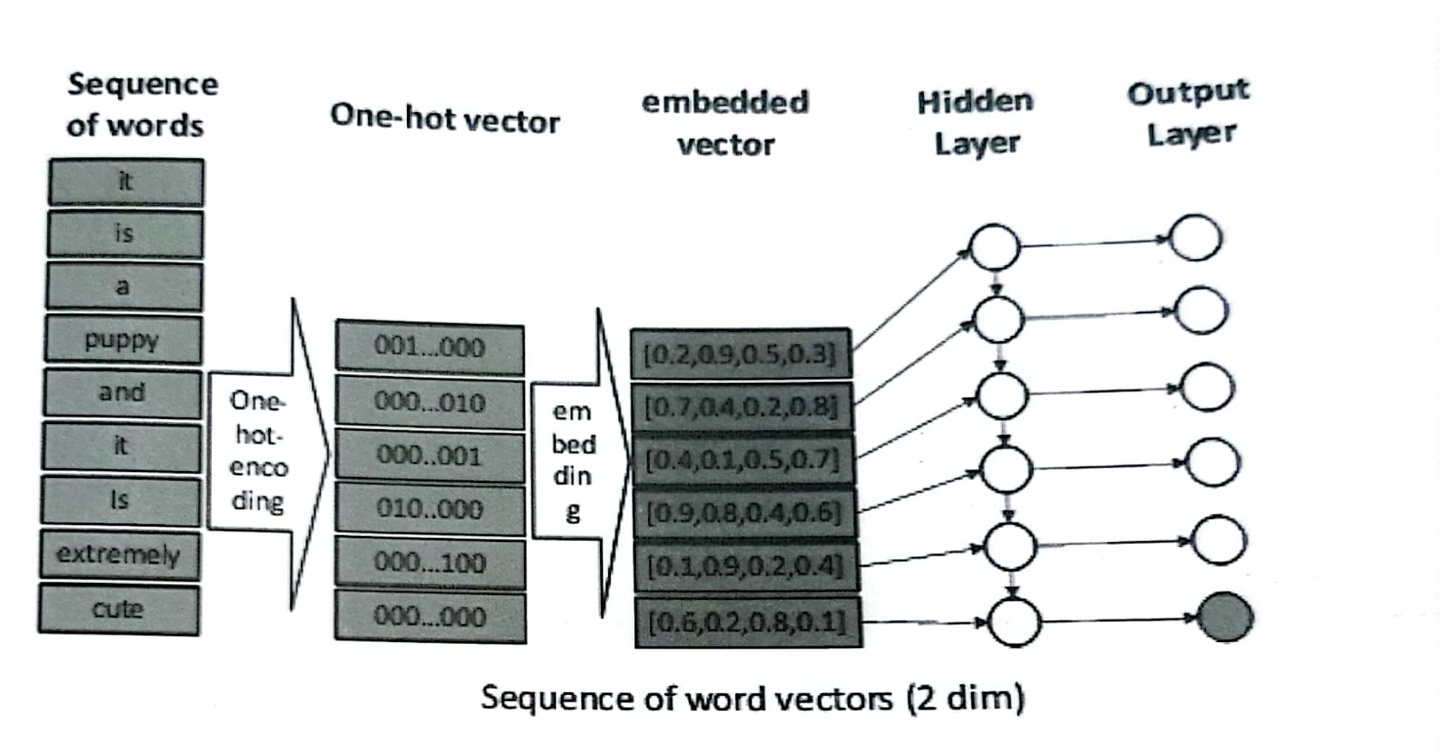

In [11]:
#----------------------------------------
# 10.1.3 RNN의 문서 분류 적용방안 
# 순환 신경망은 주어진 입력값들의 순서가 의미가 있을 때, 즉 입력값이 앞의 입력값들에 영향을 받는 경우 사용 
    # 1. 시계열 값 분석 
    # 2. 자연어 처리 - 문장을 이루는 단어들의 순서를 반영하기 위해 사용 
        # 문장, 단어들의 순서에 따라 문맥이 결정 , 문맥 파악에 순환 신경망 사용 
#----------------------------------------

from IPython.display import Image
Image(filename = './img/ch10/rnn_적용예시.jpg')

#----------------------------------------
# 문서 분류에 RNN 적용하는 경우 
# 1. 각 단어는 먼저 원핫 벡터(one-hot vector)로 표현 
# 2. 짧은 길이의 밀집 벡터(dense vector)로 다시 변환되어 RNN 모형에 입력으로 사용됨 
    # 모형의 입력은 : 6개, 분류하려는 문서는 총 9개의 단어로 이루어짐 
    # 문서의 앞쪽 단어 세개를 잘라내야 함
    # 6개의 단어를 사용해서 한 단어를 크기가 4인 벡터로 표현하면 [6,4] 크기(단어의 수, 한 단어를 표현하는 밀집 벡터의 크기)의 2차원 행렬로 표현됨 

# 각 단어의 정보는 은닉 노드로 압축됨
# 앞 단어가 뒤 단어에 미치는 영향이 순차적으로 축적되어 전달됨 
# 문서를 분류하려면, 단어 6개의 정보를 모두 사용해야 하므로, 출력 노드는 모든 정보가 축적된 마지막 은닉 노드에 연결된 것만 사용 
# 마지막 출력 노드를 이용해 문서를 분류 
#----------------------------------------

## 02. 워드 임베딩의 이해 
* RNN 모형에 입력으로 사용하기 위해 원한 벡터 -> 밀집 벡터로 변환해야 함 
* 딥러닝, 기본적으로 문서를 단어의 시퀀스로 표현하고, 각 단어들은 고정된 길이의 벡터가 돼야 함 (워드 임베딩)

In [ ]:
#----------------------------------------
# 10.2.1 워드 임베딩이란? 
#----------------------------------------
# 범주형 데이터 -> 수치로 변환하는 방법 
    # 1. 더미 변수의 이용 
        # 0과 1만으로 범주형 데이터를 표현 
        # 범주형 데이터를 벡터 형태의 연속된 수치로 변환하는 것:원핫 인코딩(one-hot encoding)
        # 그 결과, 원핫 벡터라고 함 -> sparse matrix, 대부분 0 
    # 2. 임베딩 
        # 범주형 데이터를 연속적인 값을 갖는, 상대적으로 작은 크기의 벡터로 변환하는 작업 
        # 원핫 인코딩 -> 다시 연속형 값을 갖는 축소된 벡터로 변환하는 과정 
        # 밀집 벡터(dense matrix), 대부분 변수가 0이 아닌 연속적인 값을 가짐 

# 임베딩을 하는 이유 
    # 1. 비효율적인 연산 
        # 원핫 벡터(차원이 큼)
    # 2. 대상 간의 의미적 유사도를 계산 
    # 3. 단어가 의미적인 정보를 함축함으로써 연산이 가능해짐 
    # 4. 전이학습(transfer learning) 을 가능하게 함 
        # 전이학습 - 기존에 학습된 모형을 새로운 환경에서 재사용, 학습의 속도 &효과 높이는 방법 
        # 원핫벡터 -> 임베딩 -> 밀집벡터 (즉, 학습된 가중치 행렬을 가져올 수 있음)

In [ ]:
#----------------------------------------
# 10.2.2 BOW와 문서 임베딩 
#----------------------------------------
# 카운트 기반 문서 표현 
    # 희소 벡터 자체로 유사도 계싼 가능 
    # 어느 정도 문서의 의미 반영 
    # 다만 BOW에서는 문서 단위로 임베딩 이루어짐 
        # -> 단어의 순서 정보 잃음, 문맥 파악 X 

In [ ]:
#----------------------------------------
# 10.2.3 워드 임베딩과 딥러닝  
#----------------------------------------
# BOW
    # 문서, 1차원 벡터로 표현 

# 딥러닝 기반 자연어 처리 기법 
    # 문서 -> (임베딩 된) 단어의 시퀀스로 표현
    # 단어의 순서를 고려해 문맥을 파악 
    # 임베딩 결과(형태)
        # 단어: 1차원 벡터 
        # 문서: 2차원 행렬/ 1차원 벡터의 리스트 
        # 말뭉치 : 여러 개의 문서를 변환 -> 3차원 행렬 
    
# 워드 임베딩에 기반한 딥러닝 자연어 처리의 핵심은 
    # 단어의 순서로부터 어떻게 문맥정보를 추출해낼지 

## 03. RNN을 이용한 문서 분류 - NLTK 영화 리뷰 감성분석
* RNN 모형을 설계할 때는 출력을 명확하게 하는 것이 가장 중요함 
    * 출력의 형태 : RNN 모형 뒤 & 손실 함수를 결정 
    * ex. 감성분석(긍정/부정)
        * 이진 분류 문제 
        * 최종 출력단 크기 : 1
        * 활성화 함수 : 시그모이드 
        * 손실 함수: binary_crossentropy 

In [1]:
#----------------------------------------
# 10.3.1 워드 임베딩을 위한 데이터 준비 
# nltk 데이터 (리뷰 reviews, 라벨 categories에 지정)
#----------------------------------------
from nltk.corpus import movie_reviews
fileids = movie_reviews.fileids() #movie review data에서 file id를 가져옴
reviews = [movie_reviews.raw(fileid) for fileid in fileids] #file id를 이용해 raw text file을 가져옴
categories = [movie_reviews.categories(fileid)[0] for fileid in fileids] 
#file id를 이용해 label로 사용할 category 즉 positive와 negative 정보를 순서대로 가져옴

print('Reviews count:', len(reviews))
print('Length of the first review:', len(reviews[0]))
print('Labels:', set(categories))

Reviews count: 2000
Length of the first review: 4043
Labels: {'neg', 'pos'}


In [2]:
#----------------------------------------
# RNN 모형 구축 
# 케라스를 이용해 구축 
# 모형에 적합하 형태로 입력 데이터 변환 
    # 케라스가 제공하는 토크나이저 사용
    # 기본적인 토큰화
    # 토큰, 즉 단어에 인덱스를 부여해서 사전을 작성 
    # 인덱스를 이용해 주어진 문장을 반환하는 기능을 제공 
    # ex. [I am so happy] -> 7,2,9,13][

# Tokenizer 객체 
    # 매개변수: num_words 
        # 모형에 사용할 단어 수를 결정 
    # 함수: fit_on_texts() 
        # 주어진 말뭉치에 대해 단어 인덱스 사전 구축 
        # 사전에 인덱스 0 은 사용 X, 길이가 짧은 문서 패딩 처리에 0을 사용 
    # 함수: texts_to_sequences()
        # 이 사전을 이용해 문서들을 인덱스의 시퀀스로 변환 
        # (실제 말뭉치에 사용된 단어 수> num_words) -> OOV(out-of-vocabulary)를 빼고 시퀀스 생성 
    # 매개변수: oov_token
        # 단어들을 변환할 문자열을 할당 
        # 사전에 없는 단어들이 생략되는 대신 공통의 값으로 변환되어 들어감 
#----------------------------------------
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
np.random.seed(7)
tf.random.set_seed(7)

max_words = 10000 #사용할 단어의 수

# 빈도가 높은 10000개의 단어를 선택하도록 객체 생성
tokenizer = Tokenizer(num_words=max_words, oov_token='UNK') 

tokenizer.fit_on_texts(reviews) #단어 인덱스 구축

#만들어진 단어 인덱스를 이용해 문서들을 변환
X = tokenizer.texts_to_sequences(reviews) 

print('Lengths of first 10 documents:', [len(doc) for doc in X[:10]])

Lengths of first 10 documents: [710, 240, 486, 479, 733, 671, 550, 584, 702, 776]


In [3]:
#----------------------------------------
# 토크나이저가 생성한 사전에서 단어에 대한 인덱스를 확인하고 싶다면 
# Tokenizer 객체의 word_index() 사용 
#----------------------------------------
print("Index of 'the':", tokenizer.word_index["the"])
print("Index of 'review':", tokenizer.word_index["review"])
print("Index of out-of-vocabulary words:", tokenizer.word_index["UNK"])

Index of 'the': 2
Index of 'review': 466
Index of out-of-vocabulary words: 1


In [4]:
#----------------------------------------
# 각 리뷰의 길이가 다르므로, 문서로부터 변환된 인덱스 시퀀스의 길이도 가변적
# But, 신경망 모형의 입력 길이 일정 
    # --> pad_sequences()이용해 모든 입력 시퀀스의 길이를 
    # 매개변수 maxlen의 인수만큼 동일하게 변환 
    # maxlen 
        # maxlen> -> 남는부분 잘라냄 
        # truncating 매개변수
            # 잘라낸 부분의 위치 지정 
            # pre, 시퀀스 앞 잘라냄 
            # post, 시퀀스 뒤를 잘라냄 
        # 크기가 maxlen보다 작으면 남는 부분 0으로 채움 
#----------------------------------------
from tensorflow.keras.preprocessing.sequence import pad_sequences

maxlen = 500 #문서의 단어 수를 제한

# 문서의 단어 수가 500보다 작으면 0을 채우고, 크면 잘라냄
# 잘라낼 때, 앞을 자를 지, 뒤를 자를 지 선택할 수 있음. 앞을 자르고 뒷부분을 쓰고자 하면 'pre' 선택
X = pad_sequences(X, maxlen=maxlen, truncating='pre') 

In [5]:
#----------------------------------------
# 케라스 모형에 맞게 입력을 변환 
    # 출력도 케라스 신경망 모형에 맞게 변환 
    # NLTK 라벨
        # 긍정(pos) , 부정(neg) 
        # 케라스 이진분류 모형 0,1 값 요구
        # 라벨 변경  
#----------------------------------------
import numpy as np

# label을 0, 1의 값으로 변환
label_dict = {'pos':1, 'neg':0}
y = np.array([label_dict[c] for c in categories])
print(set(y))

{0, 1}


In [6]:
#----------------------------------------
# 모형 검증 
    # 학습 데이터셋, 테스트 데이터셋 분리 
#----------------------------------------
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

print('Train set count:', len(X_train))
print('Test set count:', len(X_test))
print('Test samples:', y_test[:20])

Train set count: 1600
Test set count: 400
Test samples: [0 1 1 0 1 1 0 0 0 0 1 1 0 0 1 0 0 1 1 1]


### 10.3.2 RNN이 아닌 일반적인 신경망 모형을 이용한 분류


In [7]:
#----------------------------------------
# 단어 임베딩에 대해 이해, RNN 효과 비교하기 위해 로지스틱 회귀모형 구현 
# 시퀀스 정보 없이 예측 수행 
# 케라스 
    # Sequential() 모형 
        # 단순하게 순차적으로 층을 쌓아서
        # 신경망 모형을 구축하는데 활용할 수 있는 쉽고 단순한 도구 
        # 층이 순차적으로 쌓이지 않는 복잡한 모형 아니라면 Sequential 모형
    # Sequential 모형 예제 
        # 1. 임베딩(Embedding) 레이어
        # 2. Flatten() 레이어
        # 3. Dense() 레이어로 이루어짐
        
        # 1. 임베딩(Embedding) 레이어
            # RNN을 위해 만든 입력 받아, 원핫 인코딩과 워드 임베딩 수행하는 레이어 
            # 현재 문서 : 500개 단어
            # 총 사용 단어: 10,000개로 지정 
            # 단어를 원핫 인코딩 변환, 길이 10,000인 벡터 
            # 하나의 문서 (500, 10,000) 단어의 수, 각 단어의 크기 만큼 2차원 행렬로 표현됨 
            # --> 워드 임베딩 
                # 원핫 인코딩된 단어들 일정한 크기의 밀집 벡터로 변환 
                # 벡터의 크기를 32로 지정 
                # 즉, 크기가 10,000이었던 단어 벡터 -> 32의 크기로 압축 
                # 10,000 * 32 만큼의 파라미터 / 가중치 변수가 요구됨 
                # 모든 단어에 동일한 가중치를 적용해 워드 임베딩을 수행하므로, 문서의 크기인 500: 파라미터의 수에 반영되지 X 
                # 모형 만들고 summary() 메서드를 이용하면, 아래와 같이 층별로 출력의 모양, 파라미터 수 확인 
                # 워드 임베딩 한 결과 (단어의 수, 단어를 표현하는 밀집 벡터의 크기) : 2차 행렬 
                # Output Shape의 가장 앞에 있는 None : 학습에 사용되는 입력의 수 
                # 한 번의 학습에 사용되는 입력의 수는 가변적, 모형을 정의하는 단계에서는 설정하지 않음 
                # None 뒤의 값들로 하나의 입력값, 즉 문서에 대한 내부적인 모양 확인 
        # 2. Flatten() 레이어
            # 2차원 행렬의 형태로 된 값을 펼쳐서 1차원 벡터로 변환 
            # 형태만 변경, 별도의 파라미터 사용하지 않음 
            # 500개의 단어에 대한 각 32개의 값들 -> 500 * 32 개의 독립적인 입력변수로 변환 
            # 이를 이용해, 이진 로지스틴 회귀분석 실시 
        # 3. Dense() 레이어로 이루어짐
            # 신경망의 은닉층 
            # 모든 노드들이 연결되는 밀집 층 생성 
            # 출력의 크기를 1로 하고, 활성화 함수로 sigmoid 지정 
            # 감성분석을 위해 이진분류 하기 위해 
            # 감성의 활류 나타내는 0,1 사이의 값 하나를 출력 

#----------------------------------------
# 케라스 모형 생성 및 학습
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Embedding

model = Sequential([ #순차적 모형
    Embedding(max_words, 32, input_length=maxlen), #word embedding layer 생성
    # max_words는 one-hot encoding을 할 때의 vector 크기가 됨 - 사용된 단어의 수만큼
    # 각 단어는 32 크기의 dense vector로 embedding 됨
    # input_length는 한 document의 단어 수로 표현
    # 이 과정을 거치면 각 document는 (maxlen, 32)의 2차원 행렬이 됨 - 즉 word의 sequence가 됨

    Flatten(), # 2차원 행렬을 1차원으로 펼침
    Dense(1, activation='sigmoid') #binary logistic regression을 수행
])

model.summary() #모델의 요약정보 출력

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 500, 32)           320000    
_________________________________________________________________
flatten (Flatten)            (None, 16000)             0         
_________________________________________________________________
dense (Dense)                (None, 1)                 16001     
Total params: 336,001
Trainable params: 336,001
Non-trainable params: 0
_________________________________________________________________


In [8]:
#----------------------------------------
# 모형 학습 
# 학습 - 손실 함수, 옵티마이저 설정 
    # compile() 메서드 
        # 손실 함수 
            # 이진 분류- binary_crossentropy로 지정 
        # 옵티마이저 
            # rmsprop 
        # metrics 
            # 모형을 평가하기 위해 기본적으로 loss 
            # 추가로 사용할 지표 설정하기 위해 사용함 
            # 이 값을 주지 않으면 loss 만 출력됨 
            # ac(정확도) 추가, 각 epoch 마다 출력되는 학습 현황에 정확도 출력됨 
    
    # fit() 메서드 
        # 학습 데이터셋을 이용해 학습을 수행 
        # 학습을 위한 입력, 라벨 지정 
        # epochs : 학습의 반복 횟수 
        # vervose: 학습 진행 중 학습현황의 출력 여부 
        # validation_split : 학습 하면서 사용할 검증 데이터셋(validation set)의 비율 지정 
            # 학습 10번 수행, 학습 도중 현황출력, 검증 데이터셋: 학습 데이터셋의 20% 
            # 검증 데이터셋: 모형의 학습 현황 파악, 과대적합의 여부 판단 
            # 이를 기반으로 하이퍼 파라미터 결정 
            # 매 에포크별로 학습 데이터셋에 대한 정확도, 검증 데이터셋에 댛나 정확도 비교 
            # 적절한 학습 횟수(에포크 수)를 결정할 수 있음 
        # 매 에포크에 대한 loss와 지정한 성능지표에 대한 값을 반환 -> history 
#----------------------------------------
# 모형의 optimizer와 loss function 등을 지정
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
# 학습을 수행
history = model.fit(X_train, y_train, 
                    epochs=10,
                    verbose=1,
                    validation_split=0.2)

Epoch 1/10
40/40 [==============================] - 0s 9ms/step - loss: 0.6913 - acc: 0.5281 - val_loss: 0.6858 - val_acc: 0.5688
Epoch 2/10
40/40 [==============================] - 0s 6ms/step - loss: 0.5859 - acc: 0.9234 - val_loss: 0.6737 - val_acc: 0.6156
Epoch 3/10
40/40 [==============================] - 0s 6ms/step - loss: 0.4473 - acc: 0.9773 - val_loss: 0.6494 - val_acc: 0.6406
Epoch 4/10
40/40 [==============================] - 0s 5ms/step - loss: 0.2894 - acc: 0.9945 - val_loss: 0.6198 - val_acc: 0.6469
Epoch 5/10
40/40 [==============================] - 0s 5ms/step - loss: 0.1608 - acc: 0.9984 - val_loss: 0.5920 - val_acc: 0.6844
Epoch 6/10
40/40 [==============================] - 0s 6ms/step - loss: 0.0786 - acc: 0.9992 - val_loss: 0.5762 - val_acc: 0.6719
Epoch 7/10
40/40 [==============================] - 0s 6ms/step - loss: 0.0348 - acc: 1.0000 - val_loss: 0.5645 - val_acc: 0.6938
Epoch 8/10
40/40 [==============================] - 0s 6ms/step - loss: 0.0140 - acc: 1.00

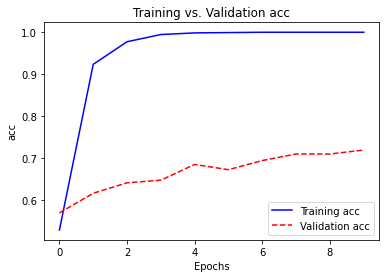

In [9]:
#----------------------------------------
# 학습 종료 
    # history에 담긴 에포크별 성능을 그래프로 그려서 학습 잘됐는지 확인 
    # plot_results() 함수
        # metric 인수로 받아 그 인수에 해당하는 값들로 그래프 그림 
        # acc(정확도) 그리지만, loss 인수로 주면 손실 함수의 값 변화 확인 가능 
#----------------------------------------
%matplotlib inline
import matplotlib.pyplot as plt

def plot_results(history, metric):
    plt.plot(history.history[metric], 'b', label='Training '+metric)
    plt.plot(history.history['val_'+metric], 'r--', label='Validation '+metric)
    plt.title('Training vs. Validation '+metric)
    plt.xlabel('Epochs')
    plt.ylabel(metric)
    plt.legend()
    plt.show()

plot_results(history, 'acc')

# 결과 확인 
    # 학습 데이터셋에 대한 정확도 : epoch 4정도에 최대치 도달 
    # 검증 데이터셋에 대한 정확도: epoch 4 이후에도 조금씩 향상, 큰 진전 X 
    # 검증 데이터셋 > 학습 데이터셋 격차 크면 , 과대적합 가능성 있음 
    # 마지막, 테스트 데이터셋에 대한 모형의 최종 성능 평가 

In [10]:
#----------------------------------------
#테스트 셋으로 학습된 모형의 성능을 평가
    # 최종 성능 72.3% 
    # 8장, BOW 기반 로지스틱 회귀분석 85.5% 에 비해 많이 떨어짐 
    # 단어 500개로 제한 1) 문서가 잘려나간 것 
    # 2) 검증 데이터셋으로 인해 학습 데이터셋의 20%가 학습에 사용되지 못함 
    # 3) 과대적합 
    # 4) 단어 순서 정보가 사라진 것 등을 원인으로 파악 
#----------------------------------------
score = model.evaluate(X_test, y_test)
print(f'#Test accuracy:{score[1]:.3f}')

13/13 [==============================] - 0s 2ms/step - loss: 0.5605 - acc: 0.7225
#Test accuracy:0.723


### 10.3.3 문서의 순서정보를 활용하는 RNN 기반 문서분류


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 32)                2080      
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 323,169
Trainable params: 323,169
Non-trainable params: 0
_________________________________________________________________


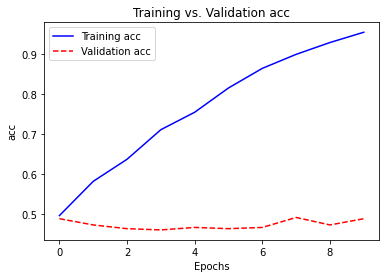

13/13 [==============================] - 0s 15ms/step - loss: 0.6972 - acc: 0.5325
#Test accuracy:0.533


In [11]:
#----------------------------------------
# RNN 모형 적용 
    # 단어의 순서, 즉, 문맥의 정보 활용하여 문서 분류 
    # 1) 앞의 모형 Flatten() 대신 -> SimpleRNN() 레이어 사용 
        # 가장 기본적인 RNN 층을 추가 
    # 2) SimpleRNN()레이어 뒤의 Dense()레이어 추가 
        # -> 최종 노드에 대해 은닉층 하나 추가
        # --> 모형의 성능을 높임 
    # 3) 속도를 위해 확성화 함수
        # relu로 지정 
    # 4) 옵티마이저 
        # rmsprop -> adam 사용
        # 다른 옵티마이저 사용 예시  
    
# SimpleRNN
    # 쓰인 인수: 32 
    # 은닉 노드의 크기 
    # 하나의 단어가 크기 32인 벡터로 표현되어 동일한 값 사용 
    # 다른 값 사용해도 상관없음 
#----------------------------------------
from tensorflow.keras.layers import SimpleRNN
from tensorflow.keras.optimizers import Adam

model = Sequential([
    Embedding(max_words, 32),
    SimpleRNN(32), # 펼쳐서 flat하게 만드는 대신 RNN 모형을 사용, maxlen만큼의 시계열 데이터
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])
model.summary()

adam = Adam(learning_rate=1e-4)
model.compile(optimizer=adam, loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, 
                    epochs=10,
                    verbose=0,
                    validation_split=0.2)

plot_results(history, 'acc')
#테스트 셋으로 학습된 모형의 성능을 평가
score = model.evaluate(X_test, y_test)
print(f'#Test accuracy:{score[1]:.3f}')

# 결과 해석 
    # 학습이 거의 이루어지지 않음 
    # 학습 데이터셋 정확도 1.0 꾸준히 올라감 
    # 검증 데이터셋 정확도 0.5 근처에서 벗어나지 못함 -> 과대 적합 / 실제 학습 X 
    # 테스트셋에 대한 정확도 53.3%로 거의 분류 X 
        # 원인 
            # 경사소실 
            # 위 모형, 하나의 문서 500개의 단어로 이루어짐 
            # 500개의 층이 겹겹이 쌓여 있음 
            # RNN의 목적은 앞에서부터 순서에 따라 다음 단어에 미치는 영향 축적 
            # 경사소실 문제로 인해 학습이 잘 되지 못하고 
            # 우리가 원하는 정보가 제대로 축적되지 못함 
            # --> 장기간에 걸친 시간의존성(long-term dependency) 학습되지 못하는 형상 
            # --> RNN의 가장 큰 문제점 
            # --> 이를 해결하기 위해 제안된 모형이 바로 LSTM(Long Short Term Memory)

## 10.4. LSTM, Bi-LSTM과 GRU를 이용한 성능 개선


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 64)          640000    
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               66048     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 65        
Total params: 714,369
Trainable params: 714,369
Non-trainable params: 0
_________________________________________________________________


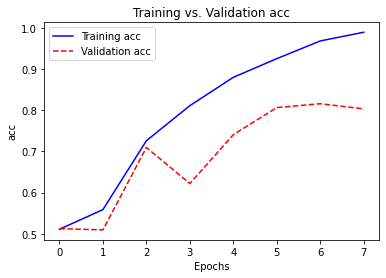

13/13 [==============================] - 1s 58ms/step - loss: 0.5636 - acc: 0.7800
#Test accuracy:0.780


In [12]:
#----------------------------------------
# LSTM의 목적 
    # 앞부분의 정보가 뒤로 갈수록 소실되는 것 방지하기 위해 
    # 장기 의존성, 단기 의존성 모두 표현 & 학습 
    # 구조적인 원리: 감쇠, 즉, 기억 손실이 없도록 함 
    # --> 장기 기억 정보를 추가함으로써, 장기의존성 학습 

# GRU(Gated Recurrent Unit)
    # LSTM 간소화한 모형 
    # LSTM에 비해 계산량이 적고 속도가 빠르면서 좋은 성능을 냄 

# RNN 개선 
    # 양방향으로 모형을 구축 
    # 앞 단어 -> 뒤 단어에 영향을 미친다는 것  
    # 모형도, 정보의 축적이 정방향으로만 이루어짐
    # but, 뒤 단어가 앞 단어에 영향을 미치기도 함 
    # --> 역방향의 영향을 함께 구현하기 위해 
    # --> 양방향(Bi-directional) LSTM 
    # 즉, 두 개층의 LSTM 구현, 각 층의 은닉 노드를 연결해서 완전한 은닉 노드 만듦  
#----------------------------------------
# LSTM 의 구현 
    # LSTM
    # 양방향 LSTM : Bidirectional으로 LSTM 레이어 감쌈 

# 임베딩 크기 64로 늘림, 양방향 LSTM 구현 
#----------------------------------------
from tensorflow.keras.layers import LSTM, Bidirectional

model = Sequential([
    Embedding(max_words, 64),
    Bidirectional(LSTM(64)), # simple RNN 대신 bidirectional LSTM을 사용
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])
model.summary()

model.compile(optimizer=adam, loss='binary_crossentropy', metrics=['acc'])

history = model.fit(X_train, y_train, 
                    epochs=8,
                    verbose=0,
                    validation_split=0.2)

plot_results(history, 'acc')

#테스트 셋으로 학습된 모형의 성능을 평가
score = model.evaluate(X_test, y_test)
print(f'#Test accuracy:{score[1]:.3f}')

# 결과 해석 
    # 검증 데이텃셋에 대한 정확도 0.8까지 올라감 
    # 테스트 데이터셋 정확도 79.3% 
    # But, 8장 나이브 베이즈로 얻은 결과였던 79.7% 못미침 
    # 문맥에 대한 학습을 통해 더 좋은 성능 X 
        # 학습 데이터 부족 
            # 딥러닝은, 로지스틱 회귀분석/ 나이브 베이즈와 같은 방법에 비해 많은 데이터 요구함 
            # 워드 임베딩 단계에서 각 단어들은 말뭉치 안에서 의미를 학습해서 밀집 벡터로 변환됨 
            # 말뭉치가 충분하지 않으면, 제대로 학습 이뤄지지 않음 
                # NLTK 학습 데이터 : 2,000개의 문서 
                    # 학습 데이터셋 :1,600개 할당 
                    # 겆증 데이터셋 20% 제외, 1,280개의 문서만 학습 
            # --> 이를 개선하기 위해 
                # 워드 임베딩 벡터에 대한 학습된 가중치를 Word2Vec 과 같은 기존의 학습된 모형으로부터 가져올 수 있음 
                # 그러나, 이또한 항상 좋은 결과 X
                    # 기존의 학습된 모형은, 일반적인 문서들 대상으로 학습
                    # 현재의 모형은 영화리뷰에 대한 감성 분석(특정 목표)
                    # 학습 부족 상태로, 시도해볼 가치는 있음 
                # RNN 를 이용한 분류, 학습 부족함(충분한 양의 데이터 확보)
        # 과대적합 등 
            # 단어의 수가 500개 이상인 문서들은 내용이 잘림 
            # 검증 데이터셋으로 인해, 머신러닝에 비해 더 적은 수의 학습 데이터로 학습 

In [13]:
#----------------------------------------
# prdict()
    # 학습된 모형 이용해 예측
    # 모형은 확률을 예측, 0과 1로 변경하고 싶다면 임계값 설정해 
        # 그 값보다 크면 1 
        # 작으면 0   
# 예시 
    # 반올림, 예측값과 실젯값 비교해 정답 여부 출력
#----------------------------------------
y_pred = np.round(model.predict(X_test[:10]))
for pred, y_t in zip(y_pred, y_test[:10]):
    print(f'predicted value: {pred[0]}, true value: {y_t}, so the prediction is {pred[0] == y_t}')

predicted value: 0.0, true value: 0, so the prediction is True
predicted value: 1.0, true value: 1, so the prediction is True
predicted value: 1.0, true value: 1, so the prediction is True
predicted value: 0.0, true value: 0, so the prediction is True
predicted value: 1.0, true value: 1, so the prediction is True
predicted value: 1.0, true value: 1, so the prediction is True
predicted value: 0.0, true value: 0, so the prediction is True
predicted value: 1.0, true value: 0, so the prediction is False
predicted value: 0.0, true value: 0, so the prediction is True
predicted value: 0.0, true value: 0, so the prediction is True
